#The Sparks Foundation
#Data Science & Business Analytics Internship
#Task - 3: Exploratory Data Analysis on Sample Superstore Dataset
#By - Sritama Dutta

**Importing the Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [4]:
ss_data = pd.read_csv("/content/SampleSuperstore.csv")

**Reading the first 5 rows of the data**

In [5]:
ss_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**General information of the Sample Superstore dataset**

In [6]:
ss_data.shape

(9994, 13)

In [7]:
"""Checking if there is any null value"""
ss_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
"""Checking if there is any duplicate value"""
ss_data.duplicated().sum()

17

In [9]:
"""Droping the duplicates values"""
ss_data.drop_duplicates(inplace = True)

In [10]:
ss_data.nunique(dropna=True)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
"""Postal code variable is not very important for our analysis.
So we can delete this variable."""
dataset = ss_data.drop(columns=["Postal Code"],axis=1)

In [12]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
dataset.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


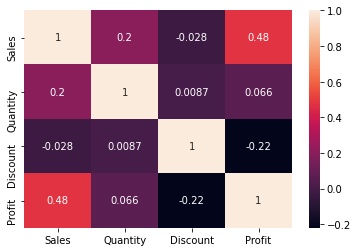

In [15]:
"""Correlation between the numerical variables"""
sns.heatmap(dataset.corr(),annot=True)

**Visualising the dataset.**

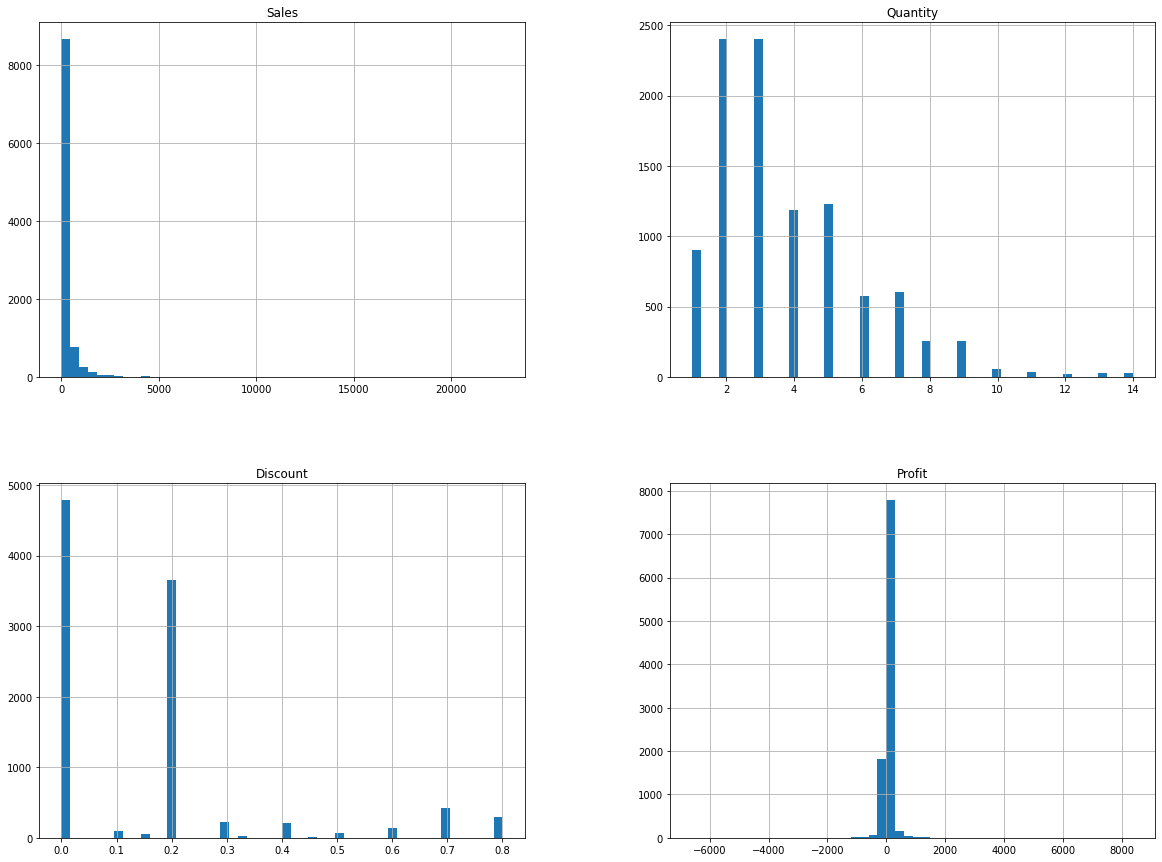

In [16]:
dataset.hist(bins=50 ,figsize=(20,15))
plt.show();

In [17]:
"""Count the total repeatable states."""
dataset['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

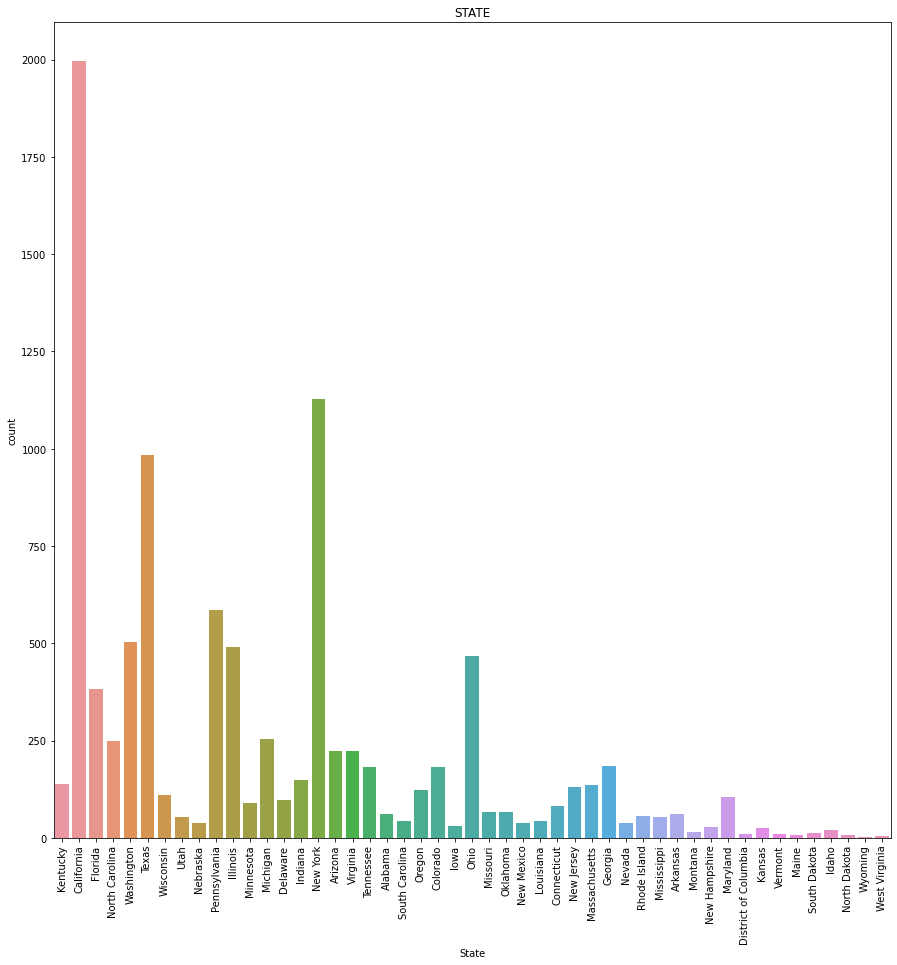

In [18]:
plt.figure(figsize=(15,15))
sns.countplot(x=dataset['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

**We can see that California and New-York has the highest number of Superstores where Wyoming  has the minimum**

In [19]:
data_1 =dataset.groupby(by = "State").sum()
data_1.drop("Discount",inplace=True, axis = 1) ##Adding the discount doesn't make sense
data_1["State"] = data_1.index
data_1.head()

,Sales,Quantity,Profit,State
State,,,,
Alabama,19510.6400,256,5786.8253,Alabama
Arizona,35282.0010,862,-3427.9246,Arizona
Arkansas,11678.1300,240,4008.6871,Arkansas
California,457576.2715,7649,76330.7891,California
Colorado,32108.1180,693,-6527.8579,Colorado


#Sales distribution over the states

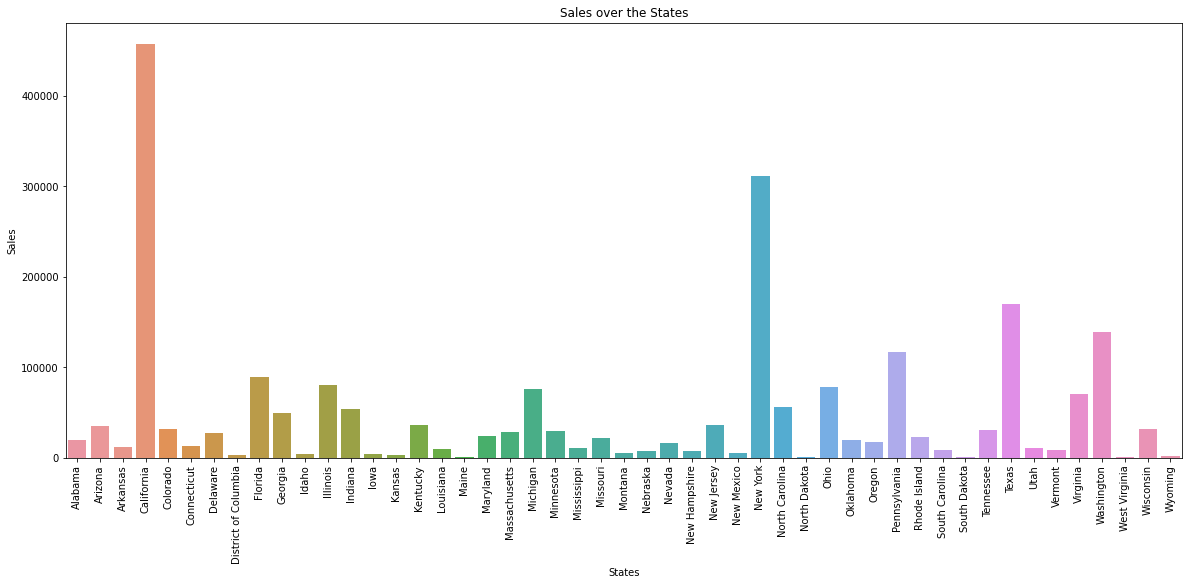

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(x = "State",
            y = "Sales", 
            data = data_1)
plt.xlabel("States")
plt.ylabel("Sales")
plt.title("Sales over the States")
plt.xticks(rotation = 90)
plt.show()

**This plot tells that Calfornia and New-York are performing the best with respect to sales**

#Profit distribution over the States

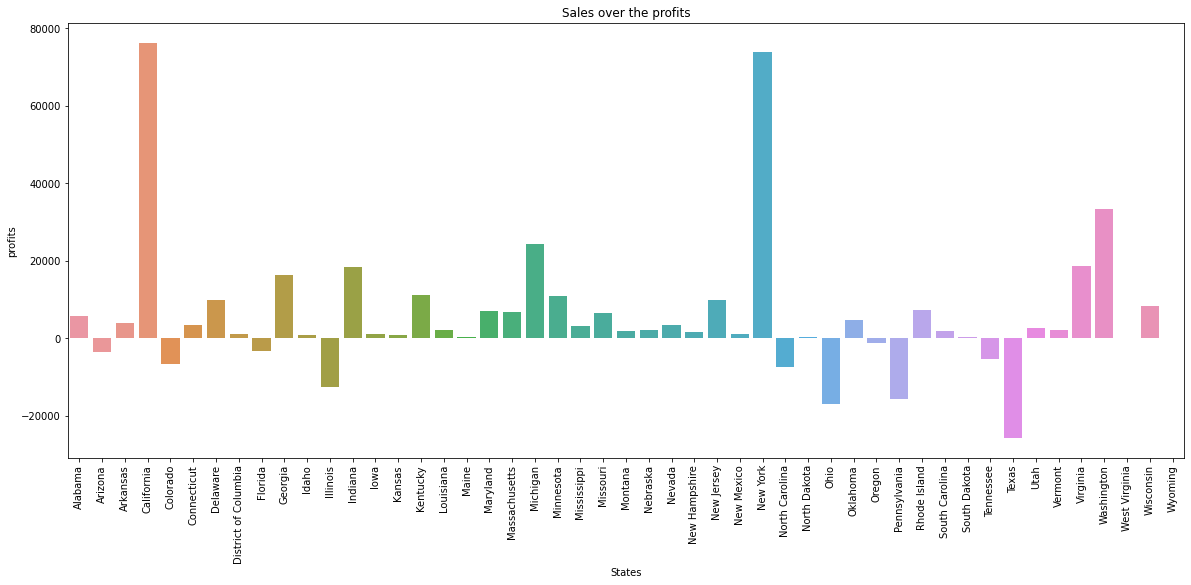

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(y = "Profit",
            x = "State",
            data = data_1)
plt.xlabel("States")
plt.ylabel("profits")
plt.title("Sales over the profits")
plt.xticks(rotation = 90)
plt.show()

**This plot shows that Texas and Ohio states are facing maximum loss where as the states Calfornia and New-York are performing well with respect to profits.
We have seen that Calfornia and New-York maximum number of superstores.**


In [22]:
data_2 =dataset.groupby(by = "Category").sum()
data_2.drop("Discount",inplace=True, axis = 1) ##Adding the discount doesn't make sense
data_2["Category"] = data_2.index
data_2.head()

,Sales,Quantity,Profit,Category
Category,,,,
Furniture,741306.3133,8020,18421.8137,Furniture
Office Supplies,718735.2440,22861,122364.6608,Office Supplies
Technology,836154.0330,6939,145454.9481,Technology


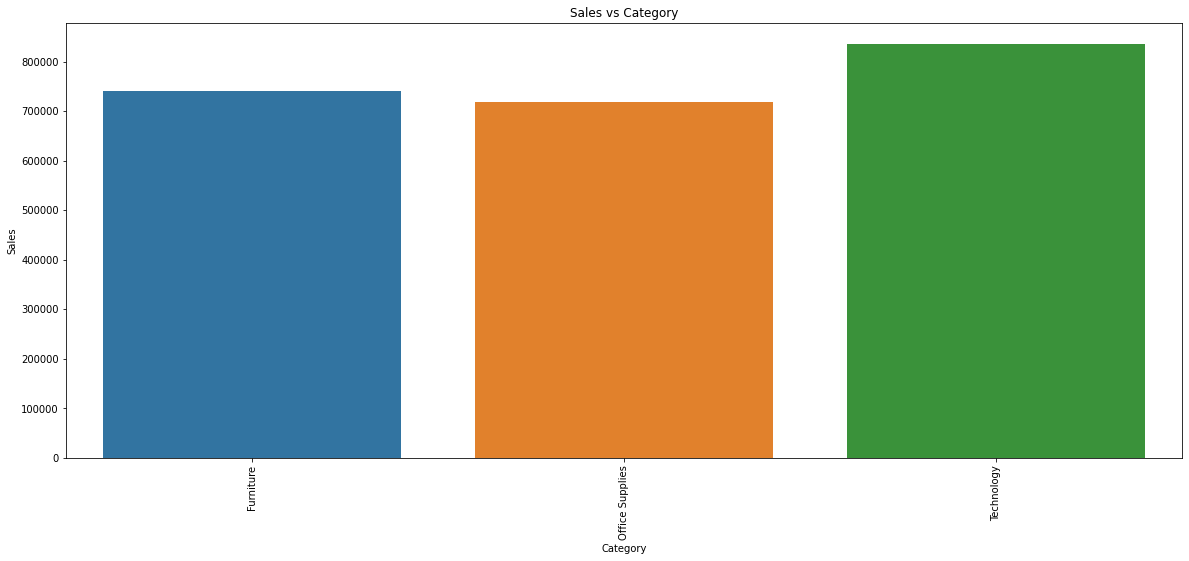

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(y = "Sales",
            x = "Category",
            data = data_2)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Sales vs Category")
plt.xticks(rotation = 90)
plt.show()

**Technology department is having maximum sales with respect to other departments**

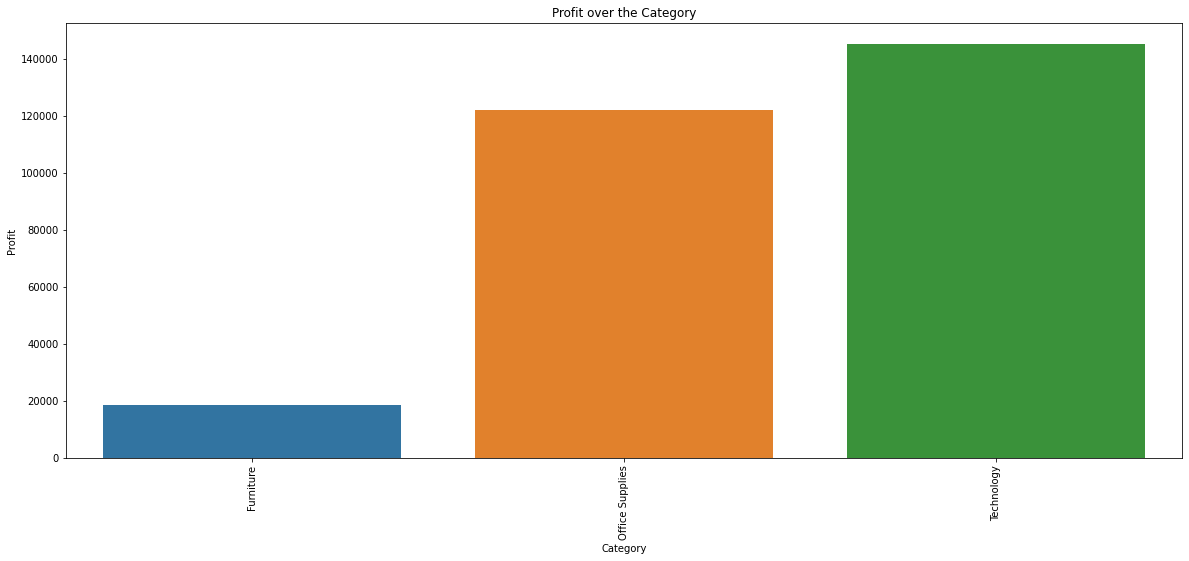

In [24]:
plt.figure(figsize=(20,8))
sns.barplot(y = "Profit",
            x = "Category",
            data = data_2)
plt.xlabel("Category")
plt.ylabel("Profit")
plt.title("Profit over the Category")
plt.xticks(rotation = 90)
plt.show()

**We can conclude from the last two graphs that Technology department has the maximum sales and maximum profits but office supplies department profits more than the furniture inspite of having less sales than furniture department.**

##Plotting Sales vs Profit Curve

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


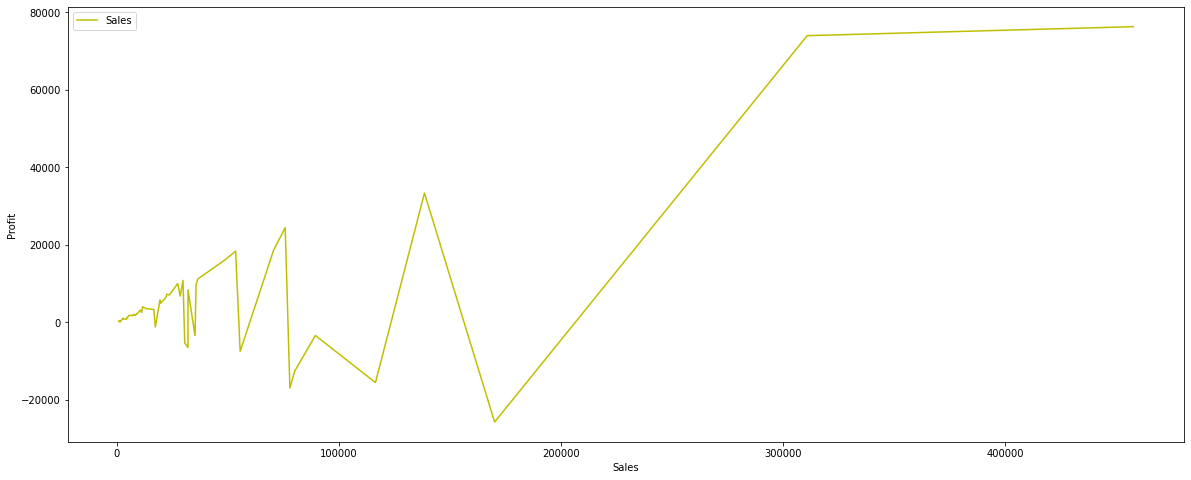

In [25]:
plt.figure(figsize=(20,8))
sns.lineplot('Sales','Profit', data=data_1 , color='y',label='Sales')
plt.legend()
plt.show()

In [26]:
data_3 = dataset.groupby(by= "Sub-Category").sum()
data_3.drop("Discount",inplace=True, axis = 1) ##Adding the discount doesn't make sense
data_3["Sub-Category"] = data_3.index
data_3.head()

,Sales,Quantity,Profit,Sub-Category
Sub-Category,,,,
Accessories,167380.3180,2976,41936.6357,Accessories
Appliances,107532.1610,1729,18138.0054,Appliances
Art,27107.0320,2996,6524.6118,Art
Binders,203409.1690,5971,30228.0003,Binders
Bookcases,114879.9963,868,-3472.5560,Bookcases


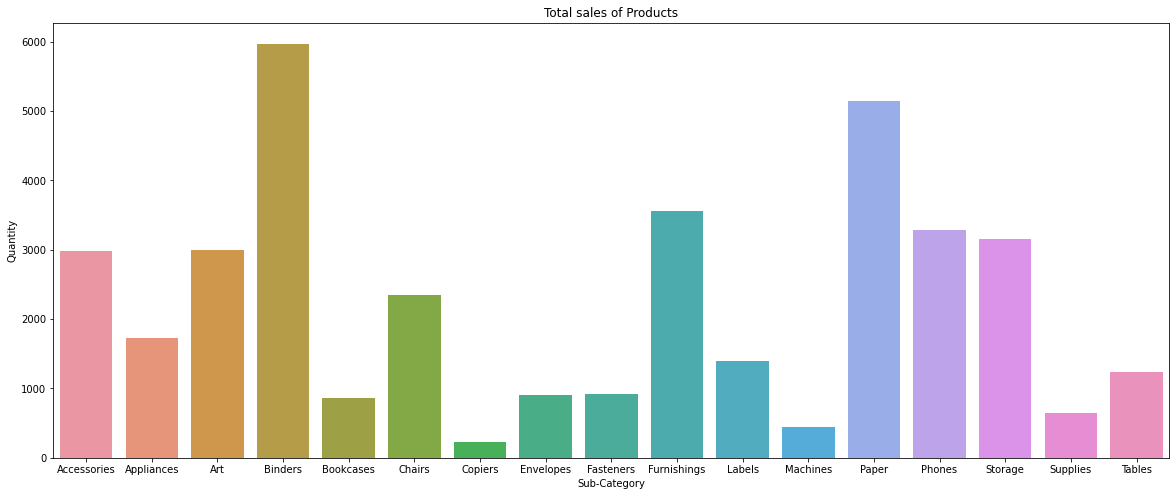

In [27]:
plt.figure(figsize=(20,8))
sns.barplot(y = "Quantity",
            x = "Sub-Category",
            data = data_3)
plt.ylabel("Quantity")
plt.xlabel("Sub-Category")
plt.title("Total sales of Products")
plt.show()

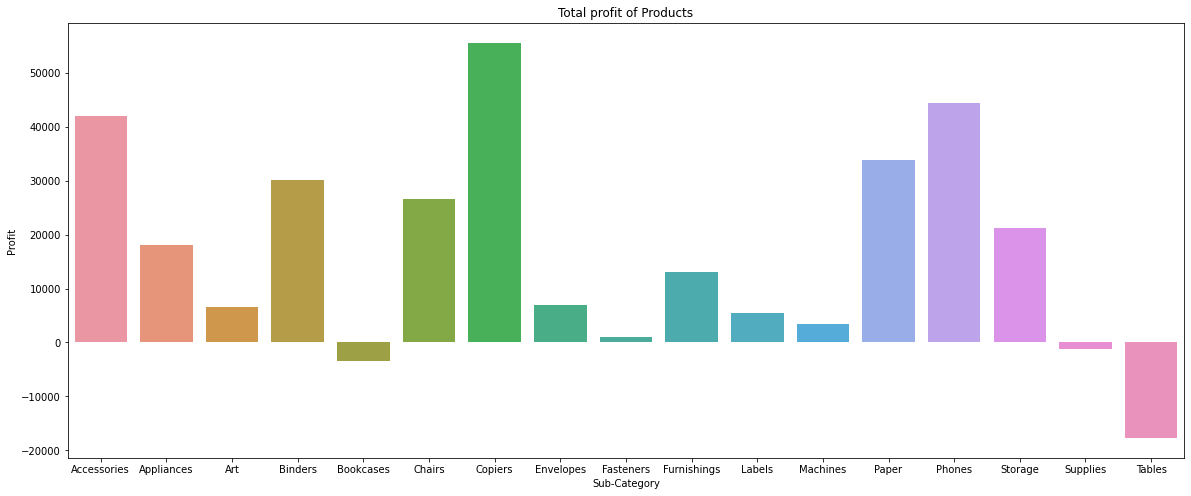

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(y = "Profit",
            x = "Sub-Category",
            data = data_3)
plt.ylabel("Profit")
plt.xlabel("Sub-Category")
plt.title("Total profit of Products")
plt.show()

**Copiers are having maximum profit where as tables are facing  maximum loss. Fasteners are having minimum profit with respect to other products**

#Thank You